# Разведочный анализ данных

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1


* **age** — возраст пациента
* **sex** — пол пациента (1 = мужчина, 0 = женщина)
* **cp** — тип боли в груди (1 = типичная стенокардия, 2 = атипичная стенокардия, 3 = другой вид боли, 4 = нет боли)
* **trestbps** — артериальное давление в состоянии покоя (мм ртутного столба, на момент госпитализации)
* **chol** — уровень холестерола (мг/дл)
* **fbs** — уровень сахара крови натощак выше 120 мг/дл (1 = да, 0 = нет)
* **restecg** — результат ЭКГ в состоянии покоя (0 = нормальный, 1 = абнормальный, 2 = признаки гипертрофии желудочка)
* **thalach** — максимальная зафиксированная частота сердцебиения
* **exang** — стенокардия в результате физической нагружки (1 = да, 0 = нет)
* **target** — наличие сердечно-сосудистого заболевания (1 = да, 0 = нет)



<Axes: xlabel='age', ylabel='Count'>

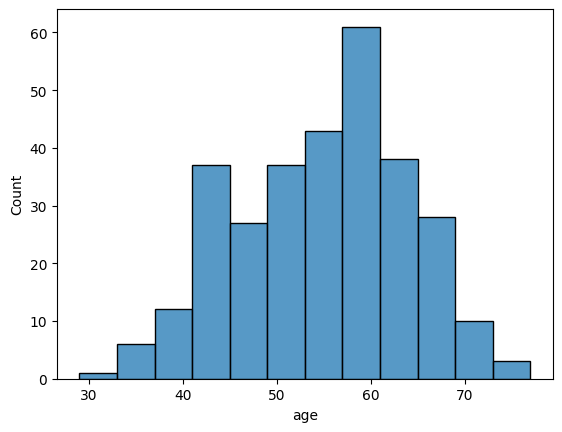

In [4]:
sns.histplot(df['age'])

In [5]:
df['target'].value_counts()

,count
target,
1,165
0,138


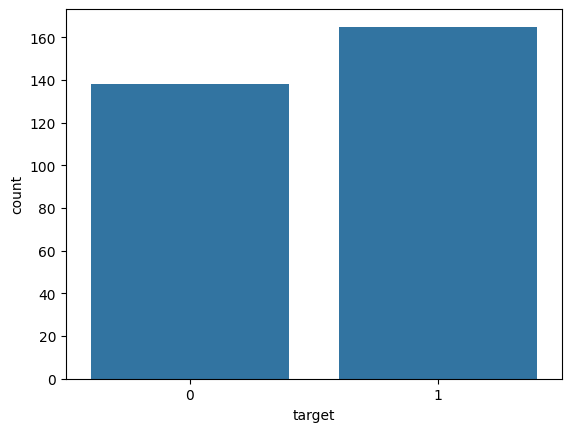

In [6]:
sns.barplot(x=df['target'].value_counts().index, y=df['target'].value_counts())
plt.show()

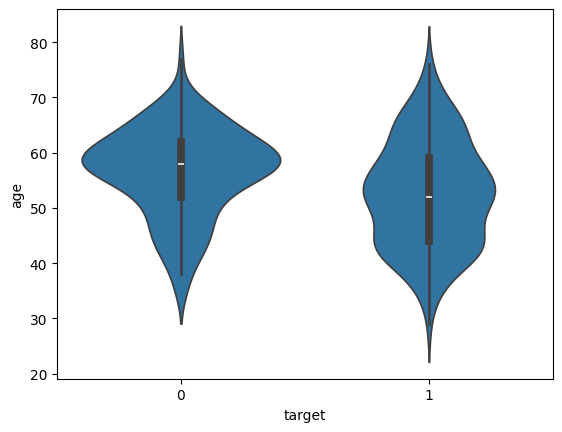

In [7]:
sns.violinplot(x=df['target'], y=df['age'])
plt.show()

<Axes: xlabel='age', ylabel='Count'>

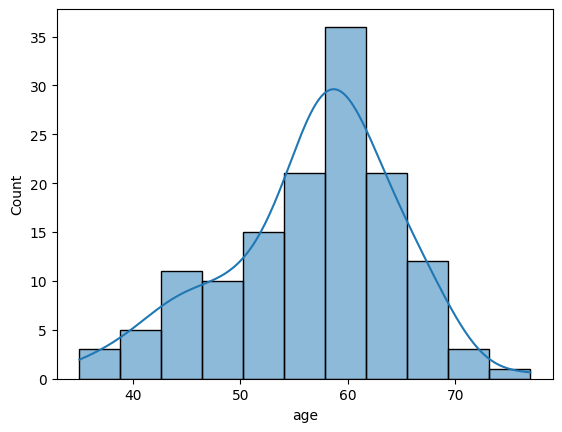

In [8]:
sns.histplot(df[df['target']==0]['age'], kde=True)

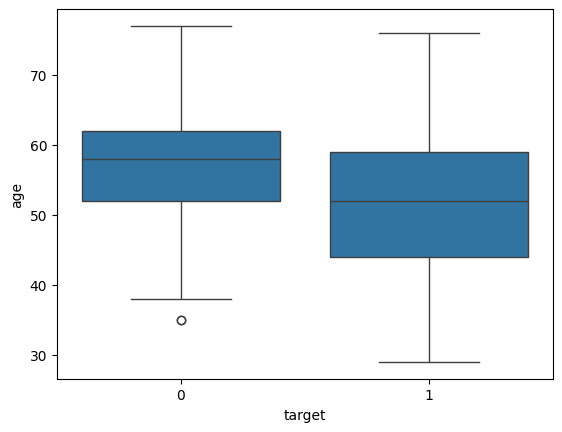

In [9]:
sns.boxplot(x=df['target'], y=df['age'])
plt.show()

In [10]:
cols_num = ['age', 'trestbps', 'chol', 'thalach']

In [13]:
correlation = df.corr().loc[cols_num, cols_num]
correlation

,age,trestbps,chol,thalach
age,1.000000,0.279351,0.213678,-0.398522
trestbps,0.279351,1.000000,0.123174,-0.046698
chol,0.213678,0.123174,1.000000,-0.009940
thalach,-0.398522,-0.046698,-0.009940,1.000000


<Axes: >

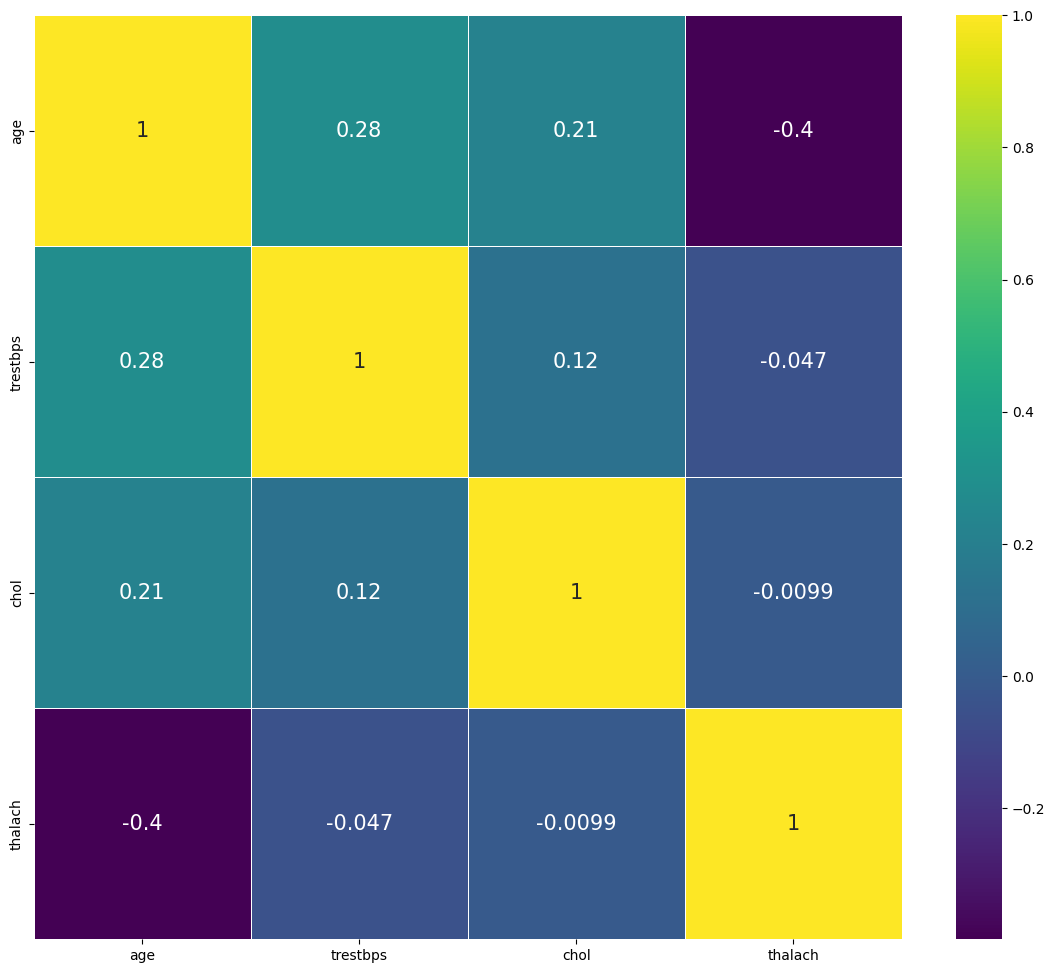

In [14]:
fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation,
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':15})

<Axes: >

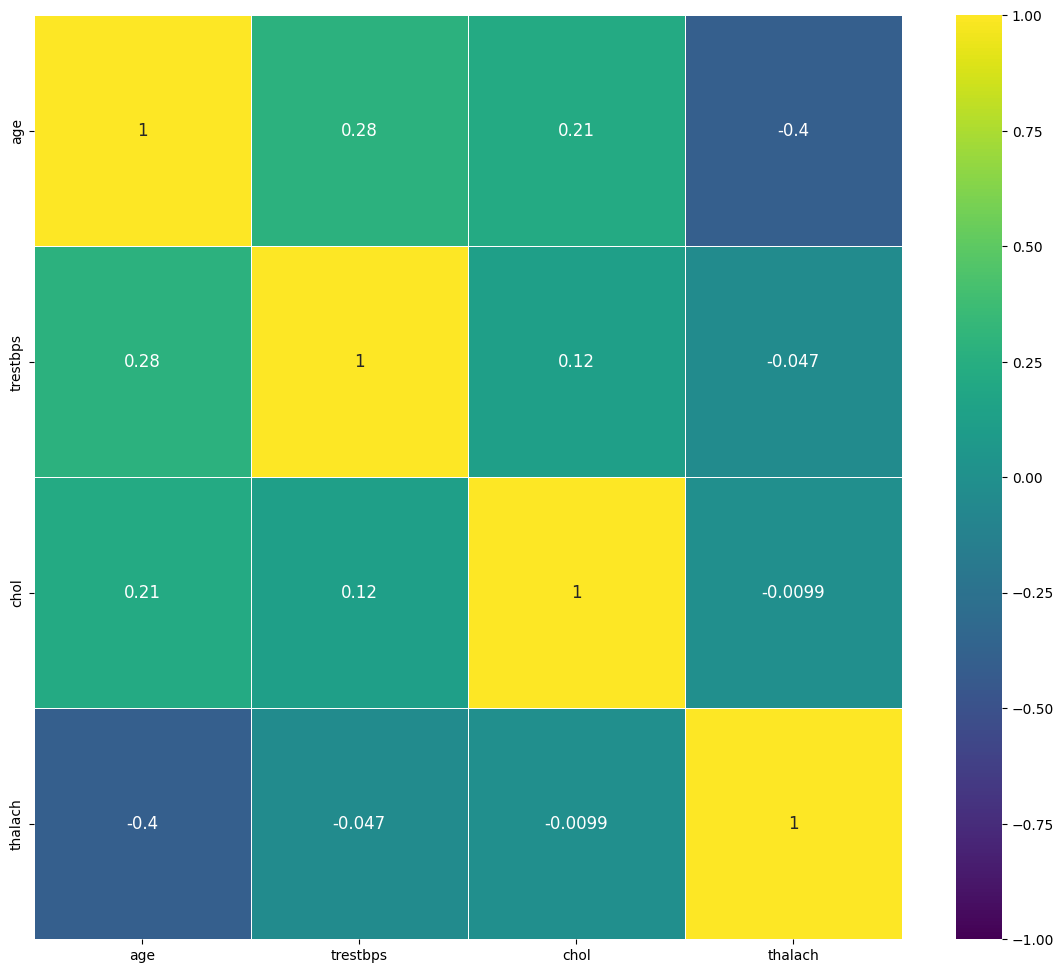

In [16]:
fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation, vmax=1, vmin=-1,
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

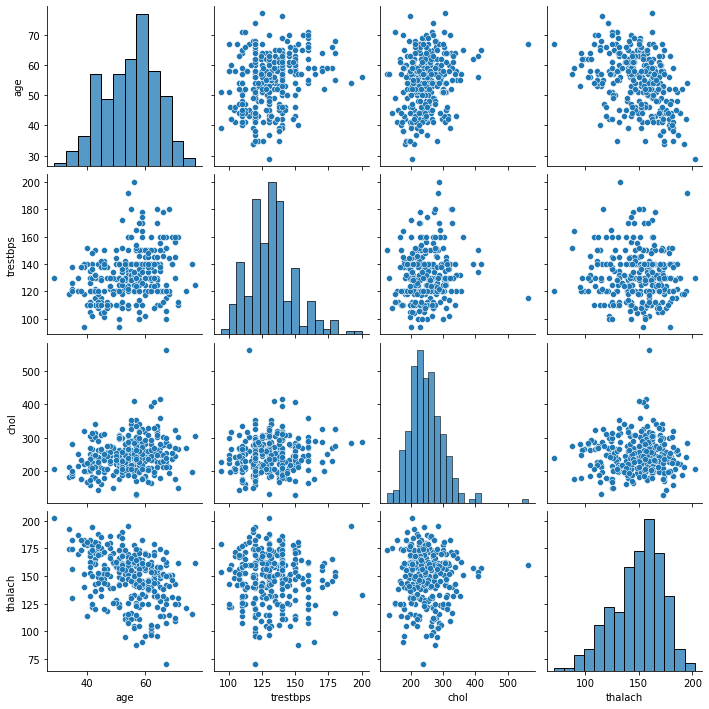

In [ ]:
sns.pairplot(df[cols_num])

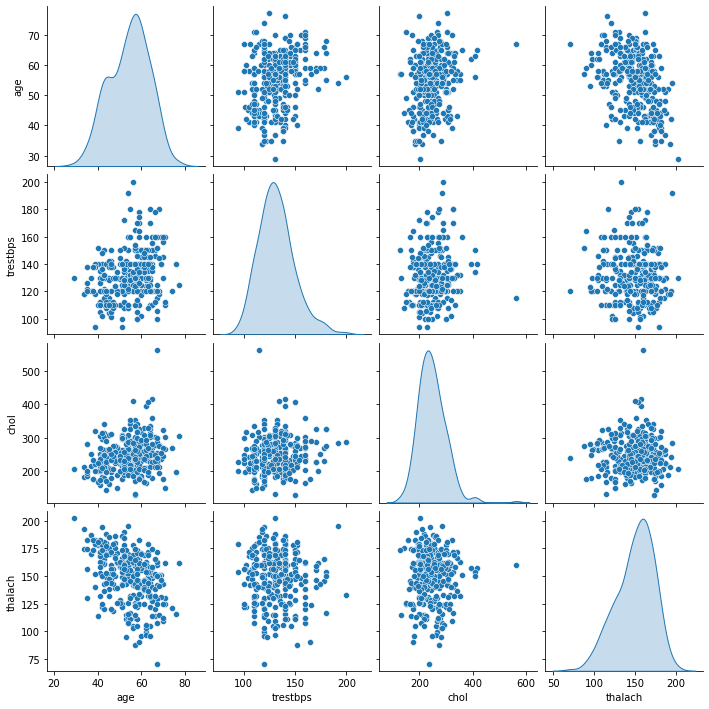

In [ ]:
sns.pairplot(df[cols_num], diag_kind='kde')

In [18]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'target']

In [29]:
df_melted = pd.melt(df, id_vars='thalach', value_vars=cat_features)
df_melted.head(500)

,thalach,variable,value
0,150,sex,1
1,187,sex,1
2,172,sex,0
3,178,sex,1
4,163,sex,0
...,...,...,...
495,113,cp,0
496,142,cp,0
497,155,cp,2
498,140,cp,0


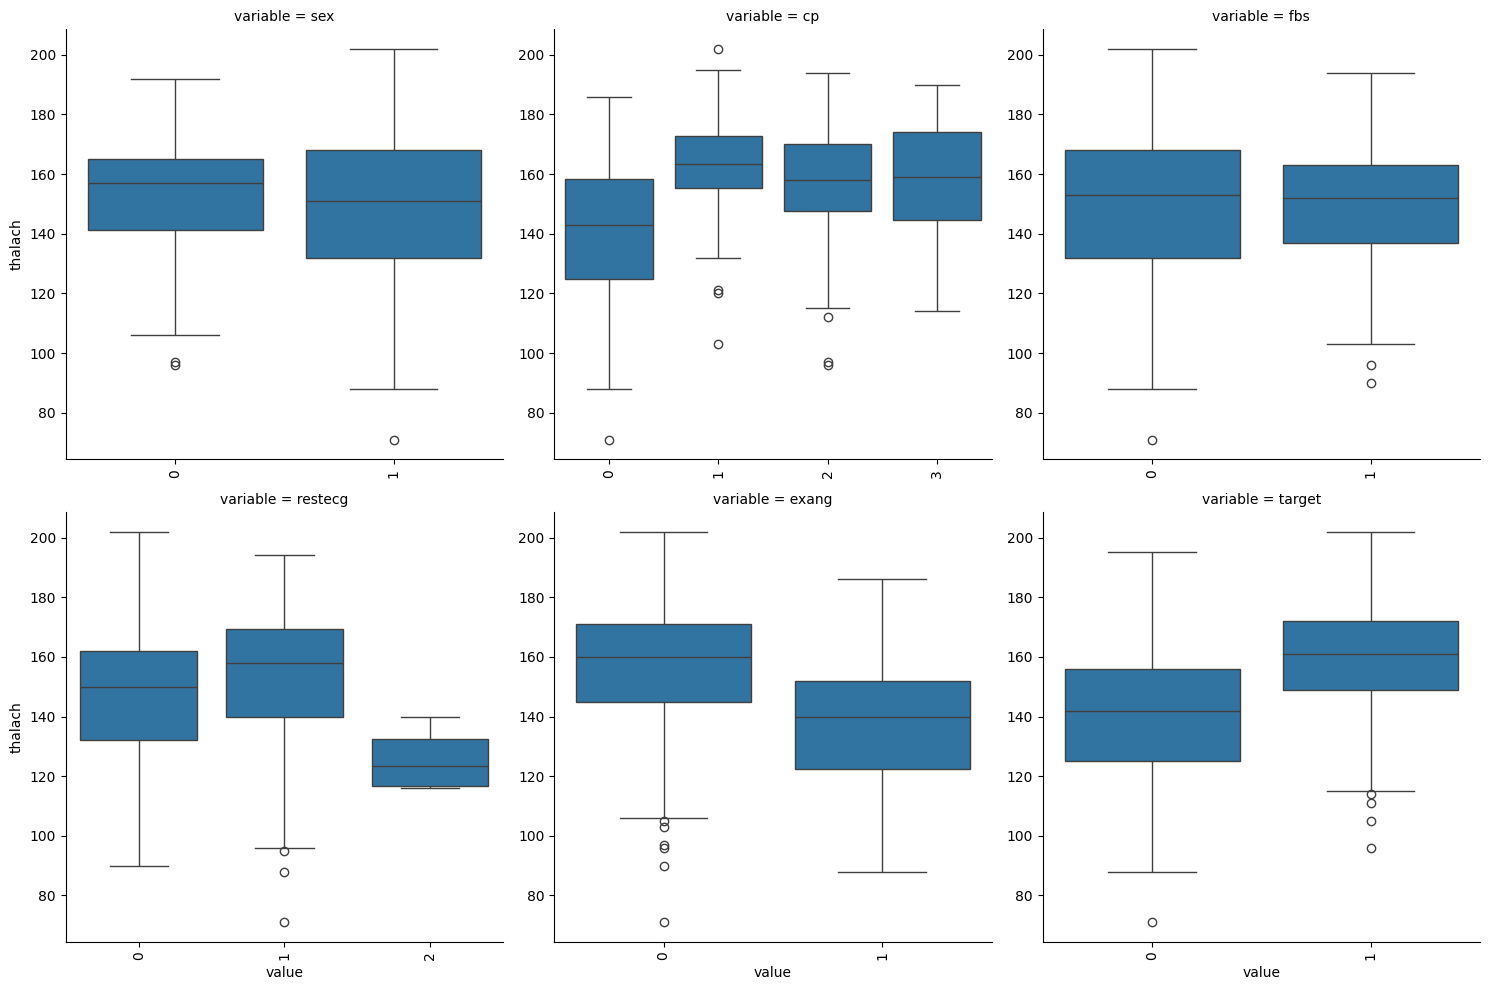

In [31]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

g = sns.FacetGrid(df_melted, col="variable",
                  col_wrap=3, sharex=False, sharey=False, height=5)
g.map(boxplot, "value", 'thalach')